### Кластеризация данных

#### Описание задания:
Вам нужно применить три метода кластеризации (K-means, DBSCAN и иерархическую кластеризацию) для анализа синтетических и реальных данных. Оцените результаты работы каждого метода и визуализируйте кластеры.

---

#### **Задачи:**
1. **Синтетические данные:**
   - Создайте набор данных с 2–3 группами точек (кластеров) в двумерном пространстве.
   - Примените три метода кластеризации: K-means, DBSCAN, иерархическую кластеризацию.
   - Визуализируйте полученные кластеры и сравните результаты.

2. **Реальные данные:**
   - Возьмите набор данных о цветах ириса (*Iris dataset*), содержащий информацию о длине и ширине лепестков и чашелистиков.  
     Используйте только числовые признаки.
   - Примените три метода кластеризации: K-means, DBSCAN, иерархическую кластеризацию.
   - Сравните результаты кластеризации с реальными метками классов.

3. **Анализ параметров:**
   - Для каждого метода кластеризации варьируйте ключевые параметры:
     - K-means: число кластеров.
     - DBSCAN: радиус окрестности (`eps`) и минимальное число точек (`min_samples`).
     - Иерархическая кластеризация: метод связи (`linkage`).
   - Оцените, как изменения параметров влияют на результаты кластеризации.

---


## 1. Синтетические данные:

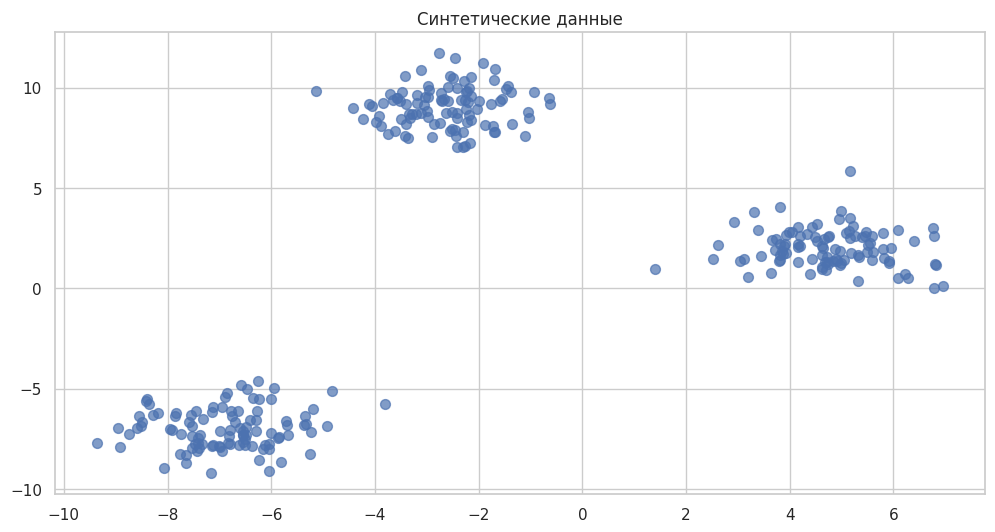

In [ ]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Установки для визуализации
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Генерация синтетических данных
X_synthetic, y_synthetic = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], s=50, alpha=0.7)
plt.title("Синтетические данные")
plt.show()


# K-means

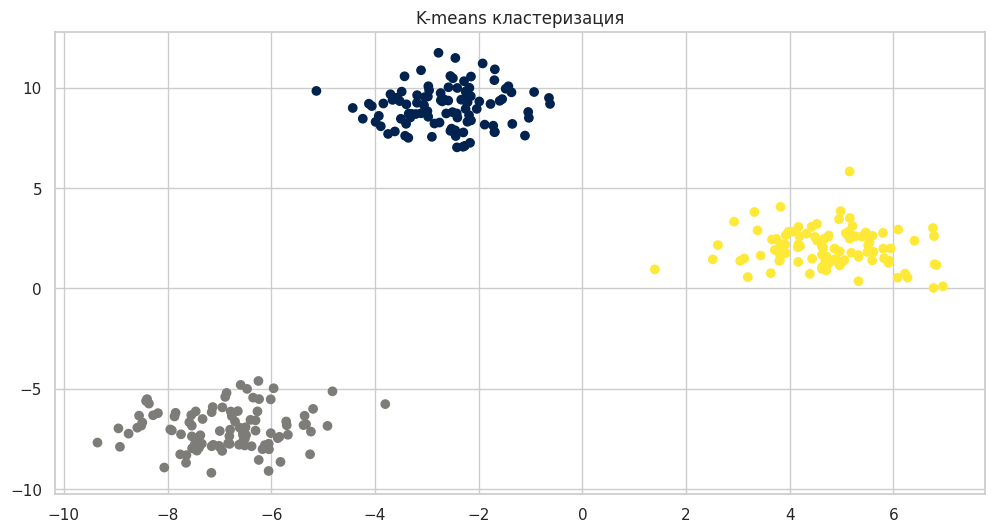

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X_synthetic)
clusters = k_means.predict(X_synthetic)

plt.scatter(X_synthetic[:,0], X_synthetic[:,1], c = clusters, cmap='cividis')
plt.title('K-means кластеризация');

# DBSCAN

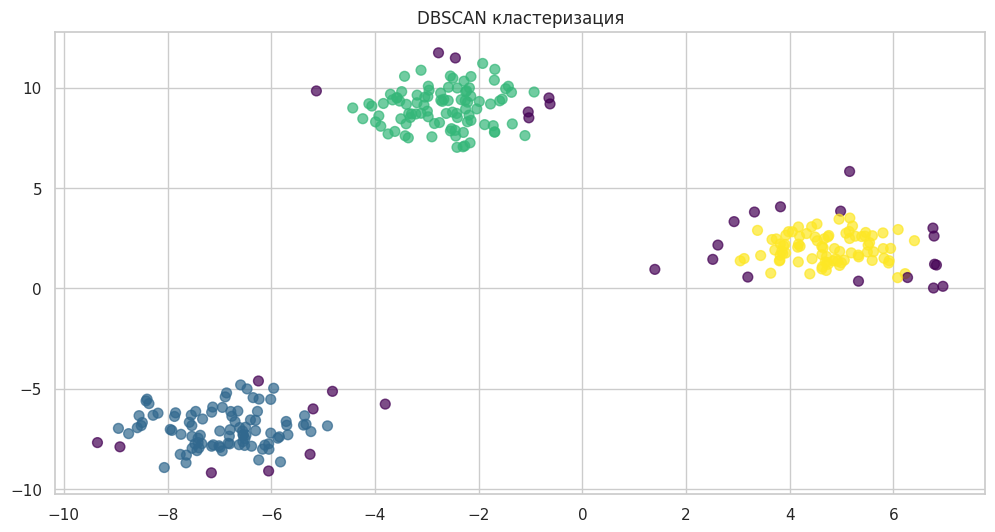

In [ ]:
from sklearn.cluster import DBSCAN
eps = 0.75
min_samples = 10


dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X_synthetic)
plt.scatter(X_synthetic[:, 0],X_synthetic[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title("DBSCAN кластеризация")
plt.show()


# Иерархическая кластеризация

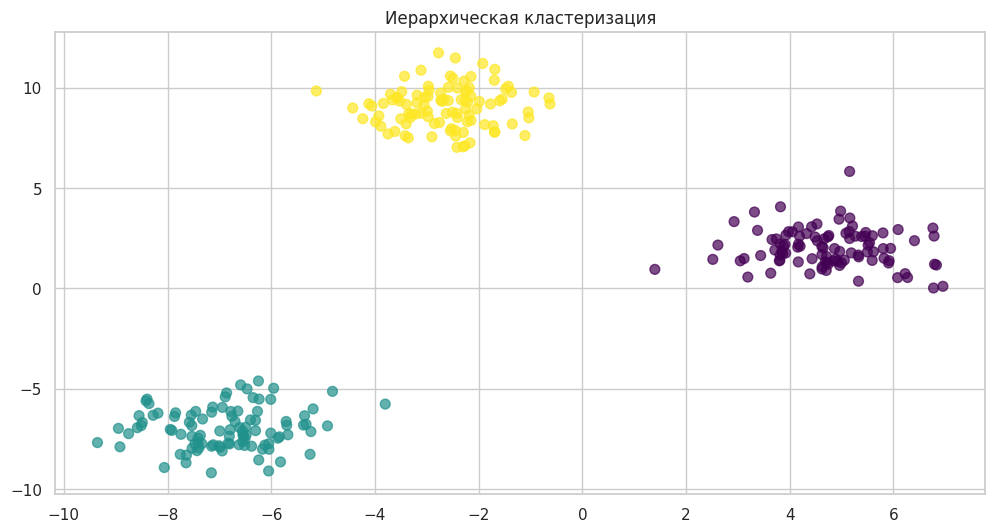

In [ ]:
aglom = AgglomerativeClustering(n_clusters=3,
                                linkage="average")
aglomclust = aglom.fit_predict(X_synthetic)
plt.scatter(X_synthetic[:, 0],X_synthetic[:, 1], c=aglomclust, cmap='viridis', s=50, alpha=0.7)
plt.title("Иерархическая кластеризация")
plt.show()

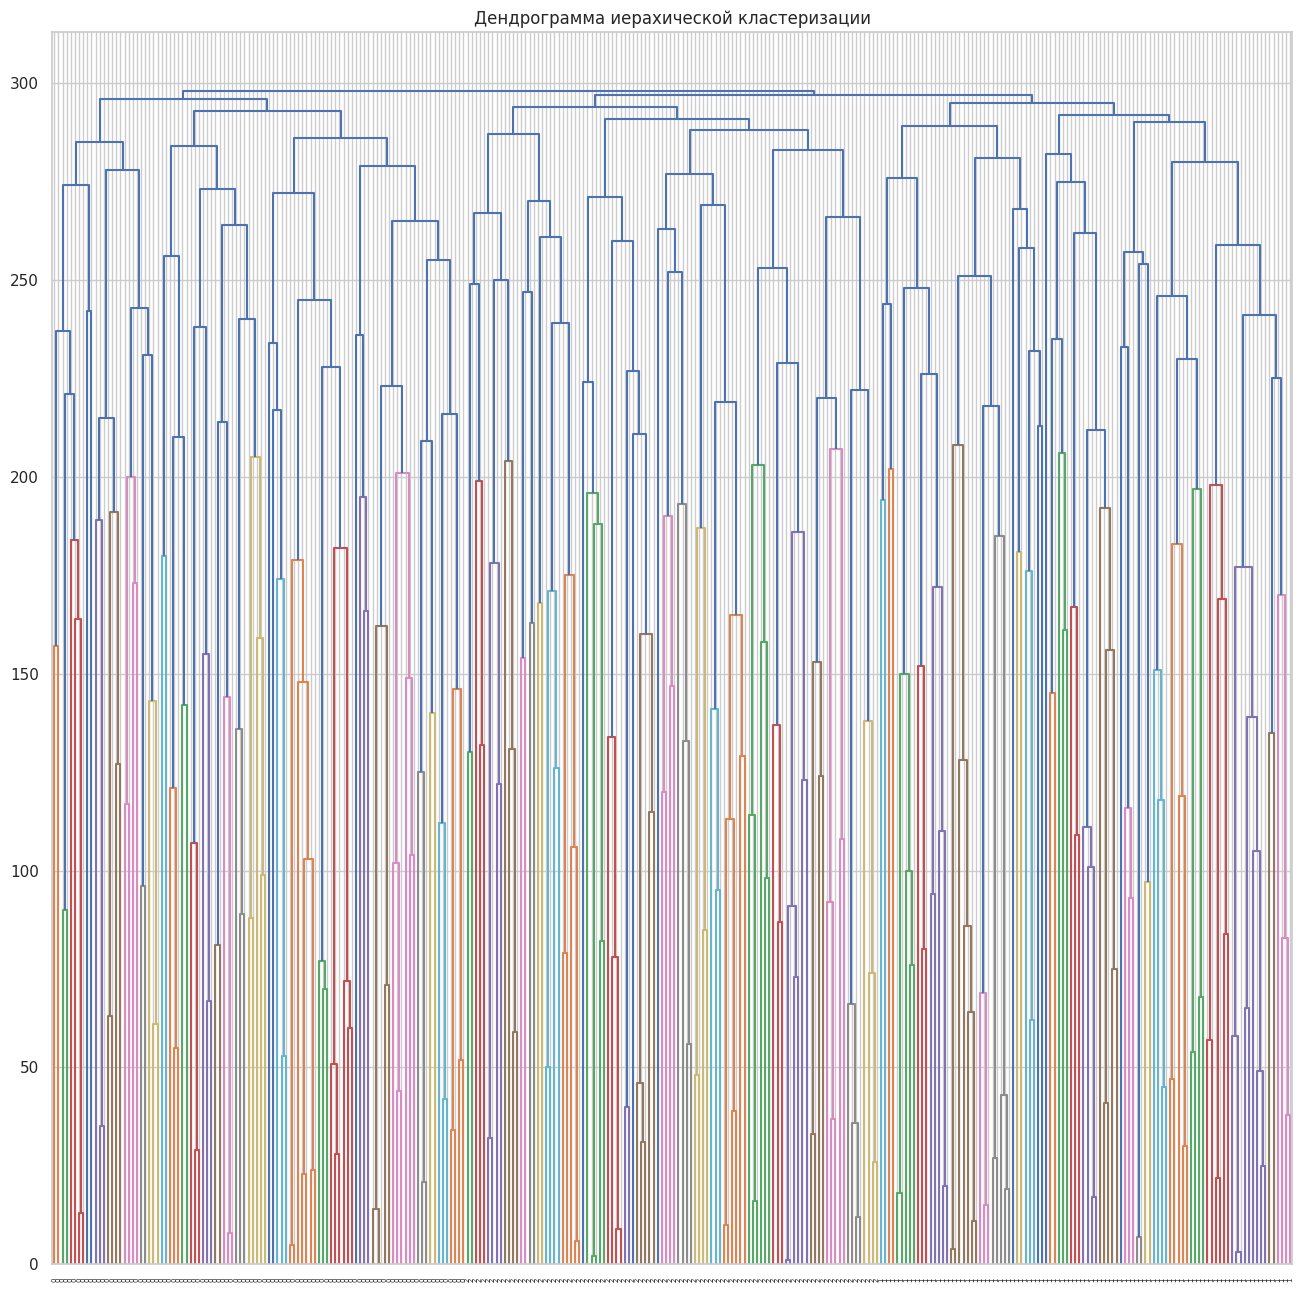

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_denfrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_


    # Расстрояние между парой дочерних кластеров
    # Поскольку у нас нет этой информации, мы можем использовать единую для построения графика
    distance = np.arange(children.shape[0])

    # Количество наблюдений, содержащихся на каждом уровне кластера.
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Создайте матрицу связей, а затем постройте дендрограмму
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X_synthetic)
plt.figure(figsize = (16,16))
plot_denfrogram(model, labels=model.labels_)
plt.title('Дендрограмма иерахической кластеризации')
plt.show()

## 2. Реальные данные:

In [ ]:
iris = load_iris()

x_iris = iris.data
y_iris = iris.target

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

# K-means

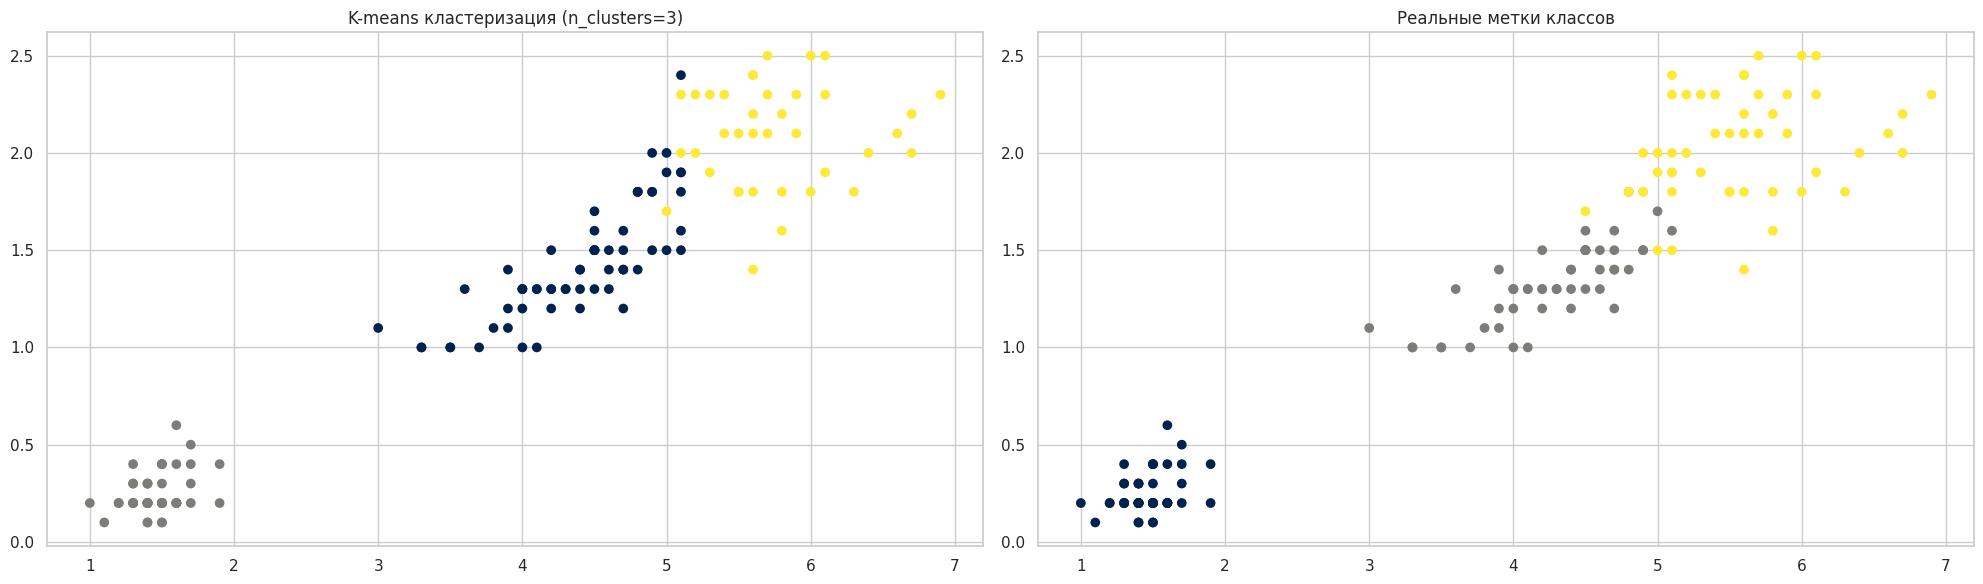

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(x_iris)
clusters = k_means.predict(x_iris)


fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].scatter(x_iris[:, 2], x_iris[:, 3], c=clusters, cmap='cividis')
axs[0].set_title('K-means кластеризация (n_clusters=3)')

axs[1].scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap='cividis')
axs[1].set_title('Реальные метки классов')


plt.tight_layout()
plt.show()


# DBSCAN

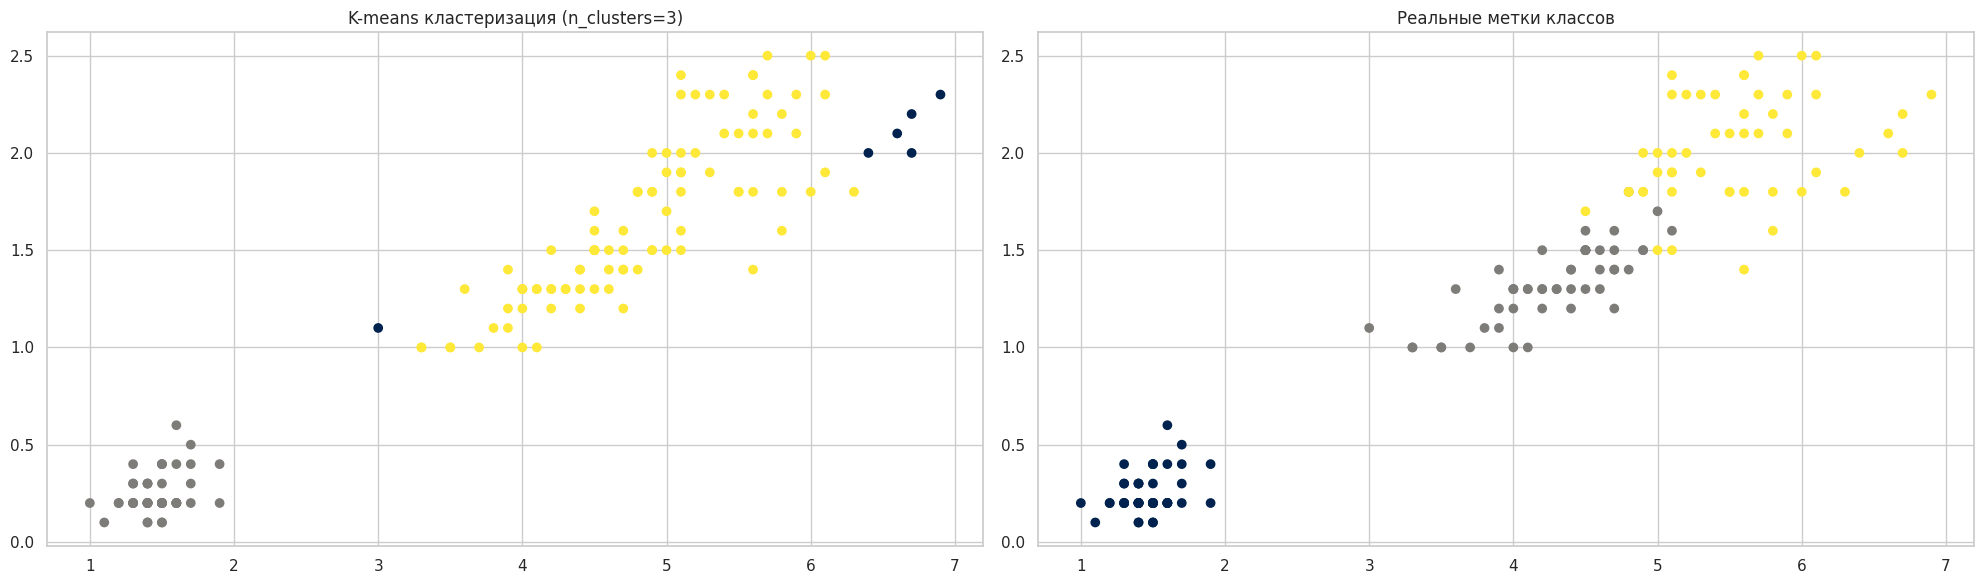

In [ ]:

eps = 0.75
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(x_iris)


fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].scatter(x_iris[:, 2], x_iris[:, 3], c=clusters, cmap='cividis')
axs[0].set_title('K-means кластеризация (n_clusters=3)')

axs[1].scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap='cividis')
axs[1].set_title('Реальные метки классов')

plt.tight_layout()
plt.show()


# Иерархическая кластеризация

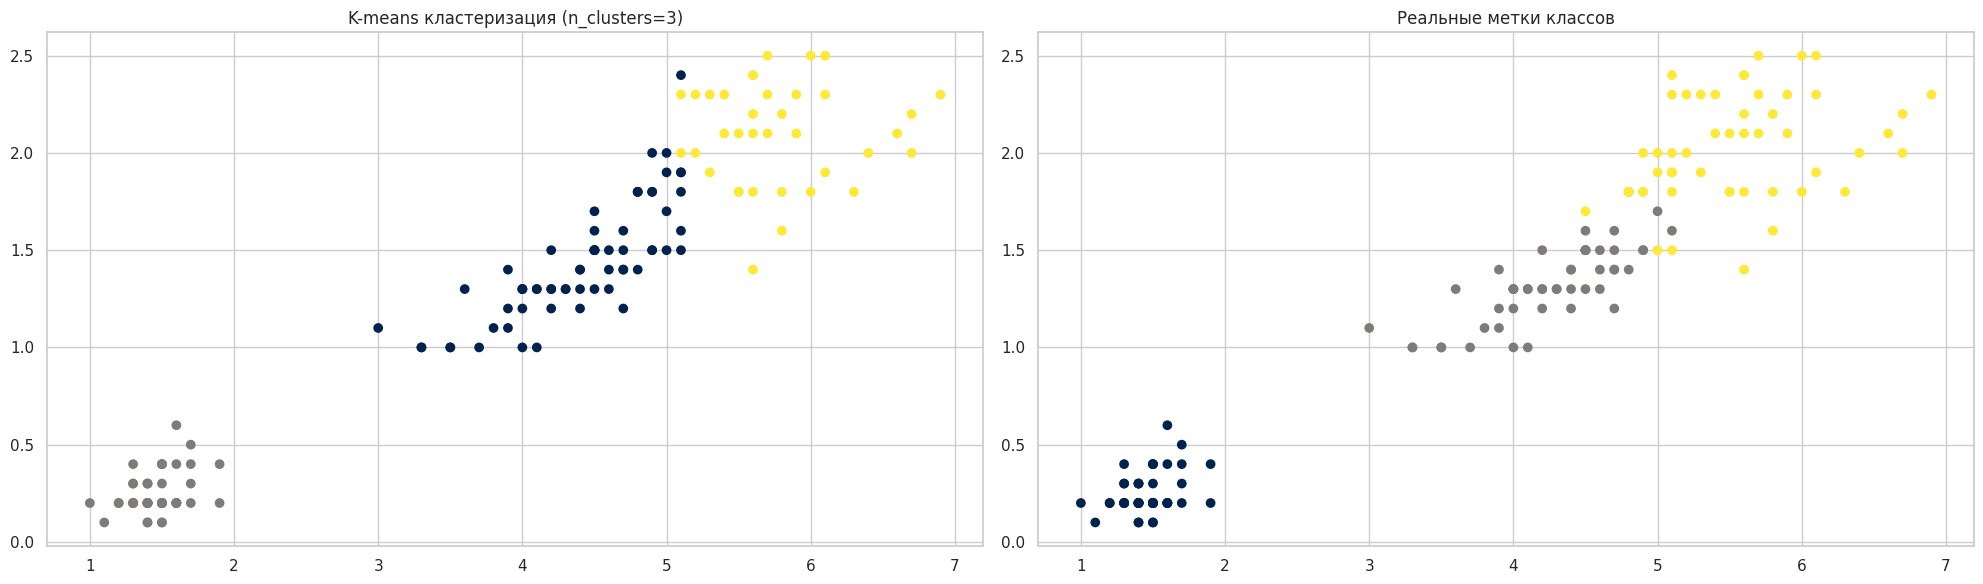

In [ ]:
aglom = AgglomerativeClustering(n_clusters=3,
                                linkage="average")
aglomclust = aglom.fit_predict(x_iris)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].scatter(x_iris[:, 2], x_iris[:, 3], c=aglomclust, cmap='cividis')
axs[0].set_title('K-means кластеризация (n_clusters=3)')

axs[1].scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap='cividis')
axs[1].set_title('Реальные метки классов')

plt.tight_layout()
plt.show()

# Анализ параметров:

*   Для каждого метода кластеризации варьируйте ключевые параметры:



## K-means: число кластеров.

### Синтетические данные

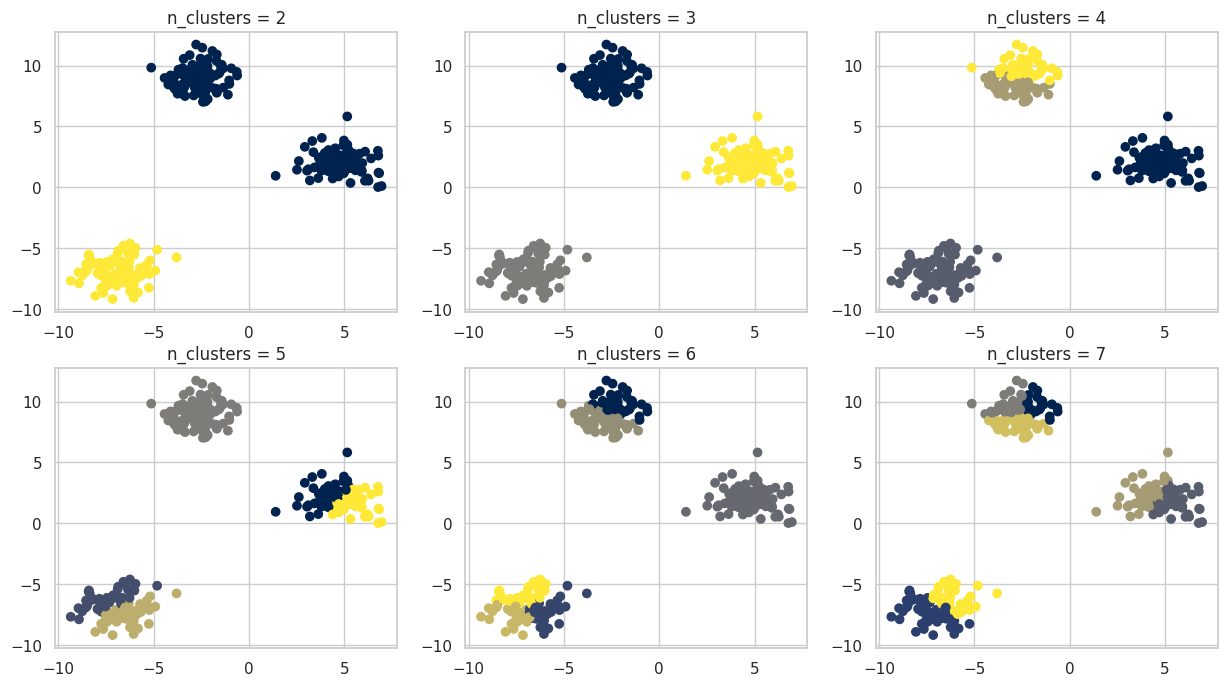

In [ ]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X_synthetic)
    clusters = k_means.predict(X_synthetic)
    plt.subplot(2,3, n_c - 1)
    plt.scatter(X_synthetic[:,0], X_synthetic[:,1], c = clusters, cmap='cividis')
    plt.title('n_clusters = {}'.format(n_c))


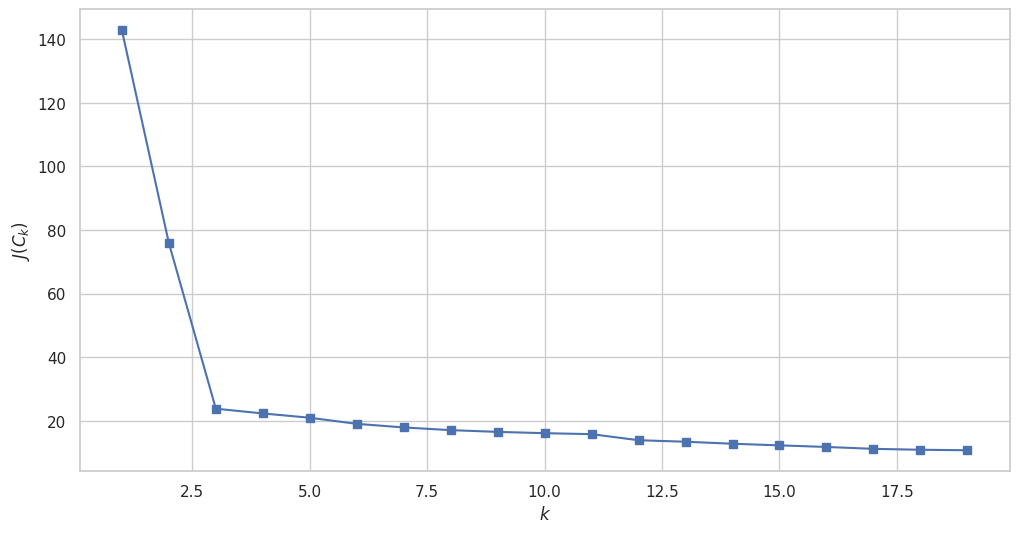

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

rg = range(1, 20)
inertia = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_synthetic)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(rg, inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

### датасет iris

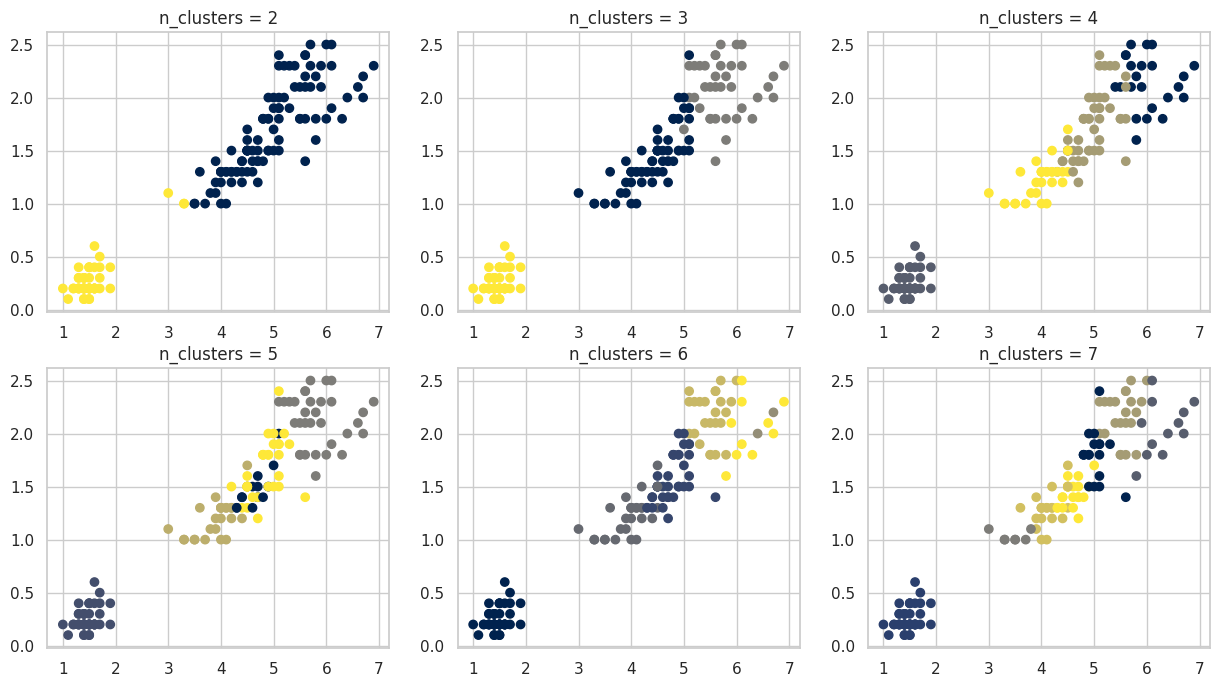

In [ ]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(x_iris)
    clusters = k_means.predict(x_iris)
    plt.subplot(2,3, n_c - 1)
    plt.scatter(x_iris[:,2], x_iris[:,3], c = clusters, cmap='cividis')
    plt.title('n_clusters = {}'.format(n_c))


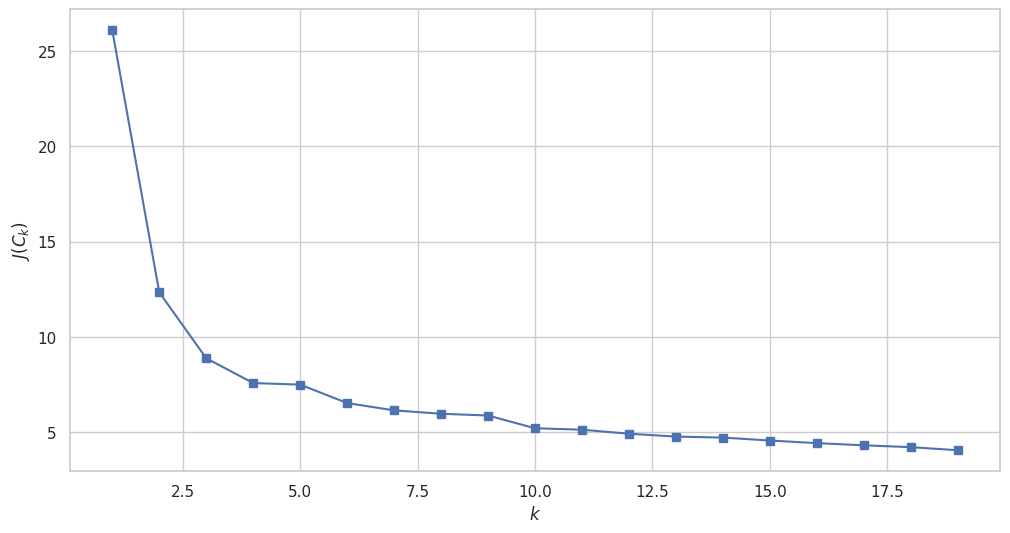

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

rg = range(1, 20)
inertia = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(x_iris)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(rg, inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

## DBSCAN: радиус окрестности (eps) и минимальное число точек (min_samples).

### Синтетические данные

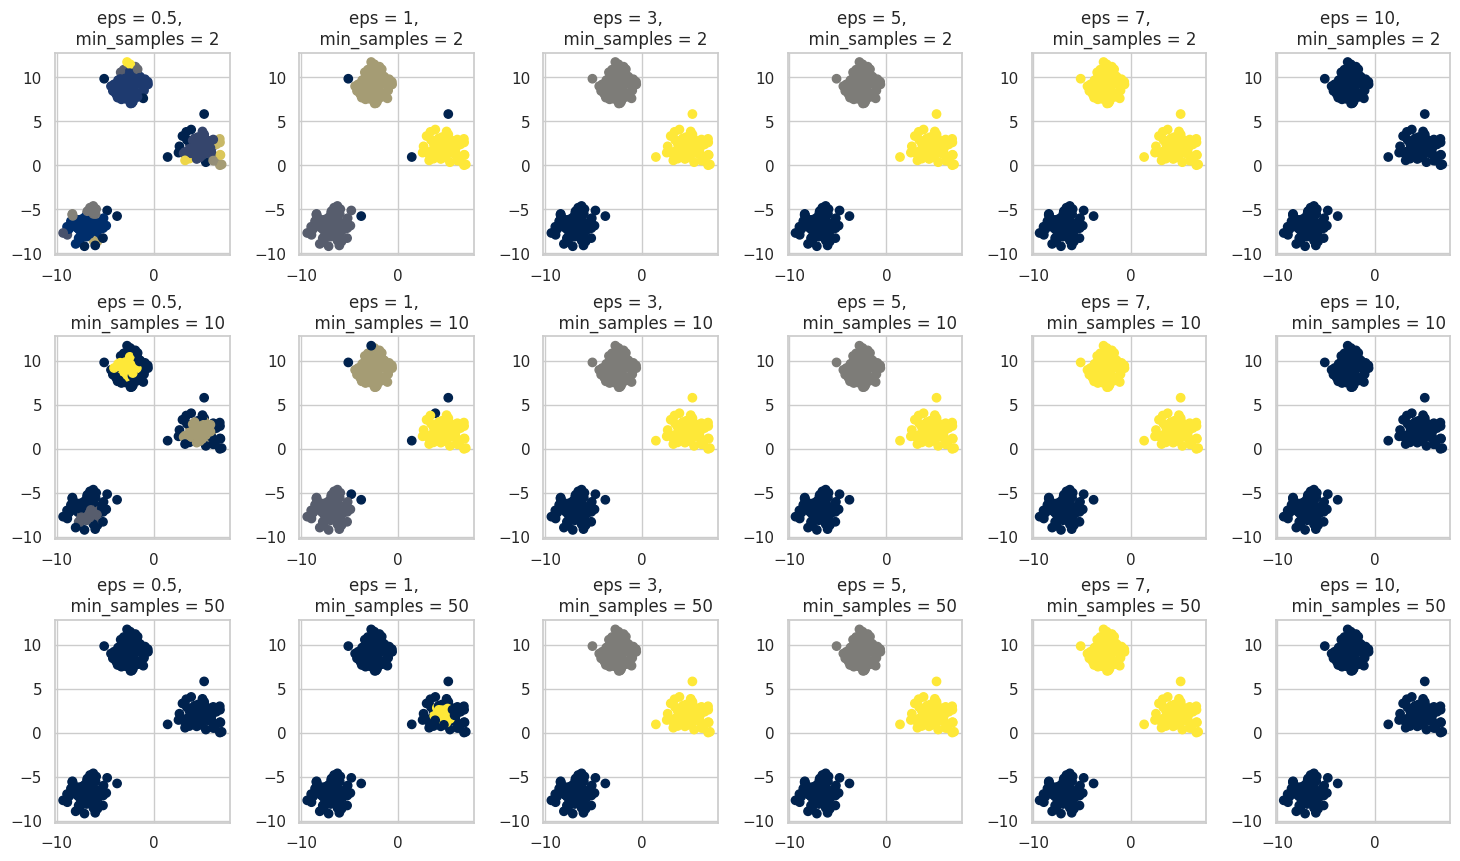

In [ ]:
from sklearn.cluster import DBSCAN

smpl = [2, 10, 50]
eps = [0.5, 1, 3, 5, 7, 10]

fig, axs = plt.subplots(len(smpl), len(eps), figsize = (18, 10))
fig.subplots_adjust(hspace= 0.4, wspace= 0.4)

for i, samples in enumerate(smpl):
    for j, e in enumerate(eps):
        dbscan = DBSCAN(eps = e, min_samples=samples)
        clusters = dbscan.fit_predict(X_synthetic)

        axs[i, j].scatter(X_synthetic[:, 0], X_synthetic[:, 1], c = clusters, cmap='cividis')
        axs[i, j].set_title('eps = {}, \n  min_samples = {}'.format(e, samples))

In [ ]:
# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]

while outlier_percentage > 0.1:
    model = DBSCAN(eps=eps).fit(X_synthetic)

    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])

    # считаем текущий процент "шума"
    outlier_percentage = sum(labels == 1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

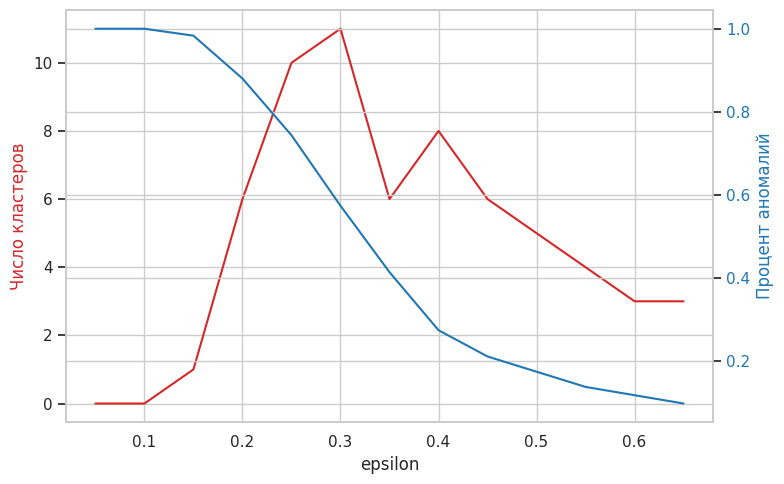

In [ ]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots(figsize = (8, 5))
color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('Число кластеров', color = color)
ax1.plot(iterations, num_clusters, color = color)

ax2 = ax1.twinx()  # инициализация второй оси в соотвествии с размером первой

color = 'tab:blue'
ax2.set_ylabel('Процент аномалий', color=color)
ax2.plot(iterations, anomaly_percentage, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.show()

### Датасет iris

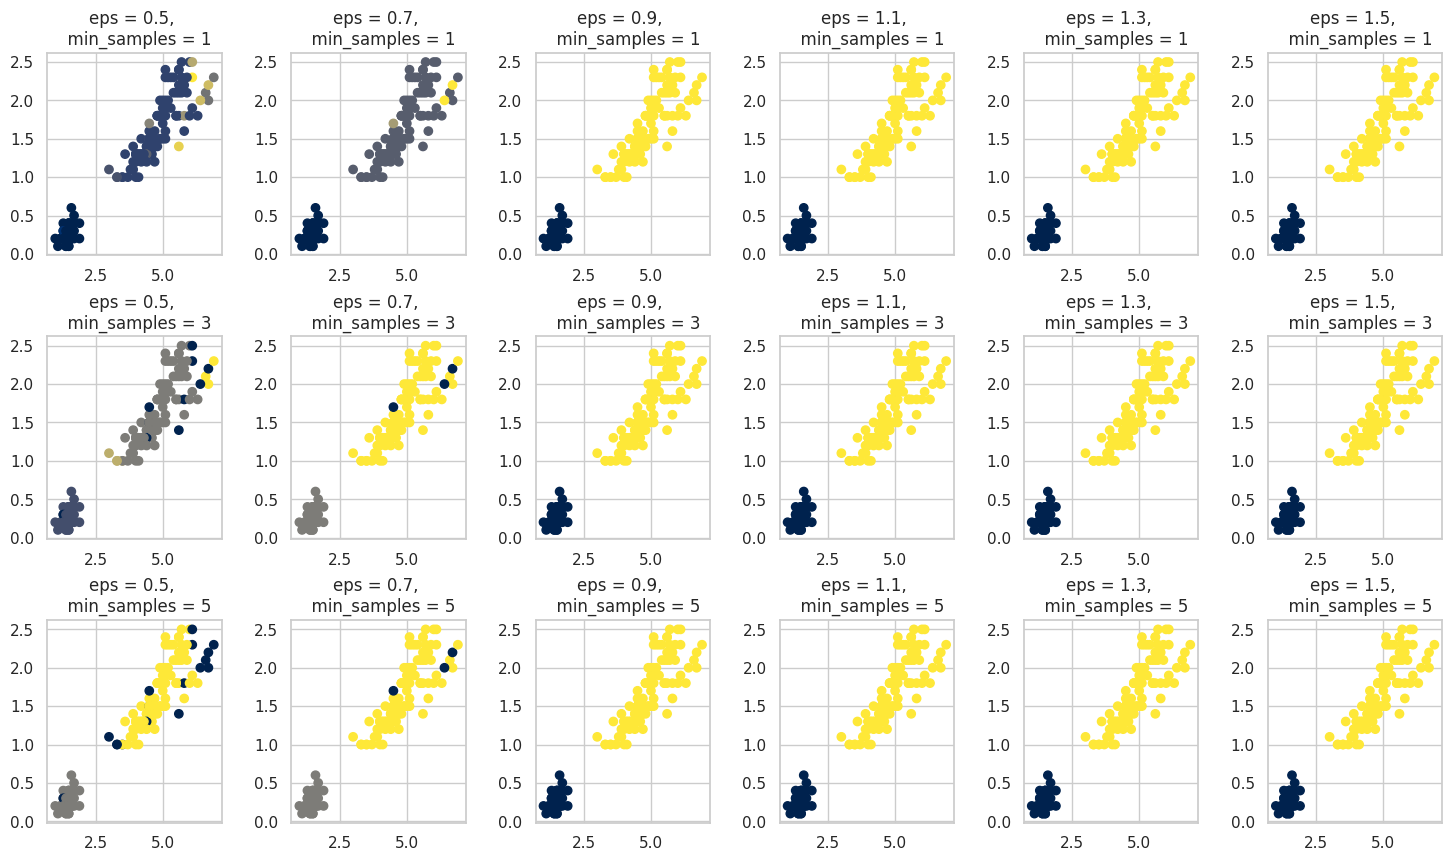

In [ ]:
smpl = [1, 3, 5]
eps = [0.5, 0.7, 0.9, 1.1, 1.3, 1.5]

fig, axs = plt.subplots(len(smpl), len(eps), figsize = (18, 10))
fig.subplots_adjust(hspace= 0.4, wspace= 0.4)

for i, samples in enumerate(smpl):
    for j, e in enumerate(eps):
        dbscan = DBSCAN(eps = e, min_samples=samples)
        clusters = dbscan.fit_predict(x_iris)

        axs[i, j].scatter(x_iris[:, 2], x_iris[:, 3], c = clusters, cmap='cividis')
        axs[i, j].set_title('eps = {}, \n  min_samples = {}'.format(e, samples))

In [ ]:
# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]

while outlier_percentage > 0.1:
    model = DBSCAN(eps=eps).fit(x_iris)

    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])

    # считаем текущий процент "шума"
    outlier_percentage = sum(labels == 1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

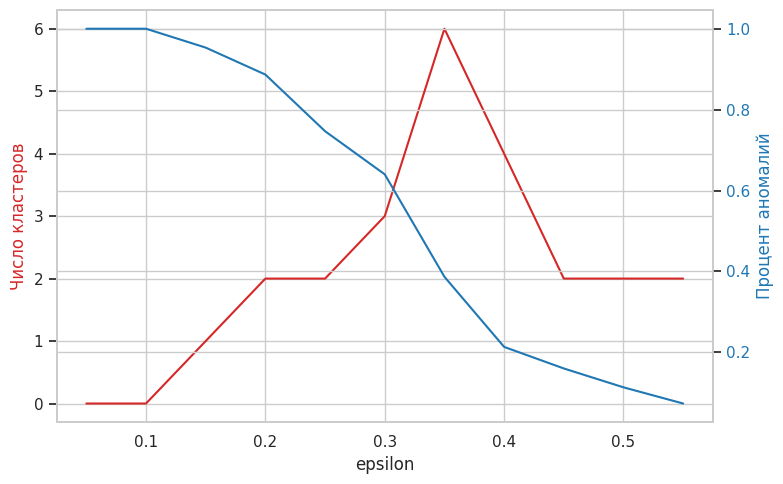

In [ ]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots(figsize = (8, 5))
color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('Число кластеров', color = color)
ax1.plot(iterations, num_clusters, color = color)

ax2 = ax1.twinx()  # инициализация второй оси в соотвествии с размером первой

color = 'tab:blue'
ax2.set_ylabel('Процент аномалий', color=color)
ax2.plot(iterations, anomaly_percentage, color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()
plt.show()

## Иерархическая кластеризация: метод связи (linkage).

**Метод одиночной связи (single linkage):** расстояние между кластерами равно минимальному расстоянию между точками из разных кластеров. Этот метод склонен к созданию длинных и извилистых кластеров.

**Метод полной связи (complete linkage):** расстояние между кластерами равно максимальному расстоянию между точками из разных кластеров. Такой метод склонен к созданию компактных и сферических кластеров.

**Метод средней связи (average linkage):** расстояние между кластерами равно среднему расстоянию между всеми парами точек из разных кластеров. Данный метод является компромиссом между методами одиночной и полной связи.


**Метод Уорда (Ward's linkage):** расстояние между кластерами равно приросту суммы квадратов расстояний от точек до центроидов кластеров при объединении этих кластеров. Этот метод стремится минимизировать внутрикластерную дисперсию.




### Синтетические данные

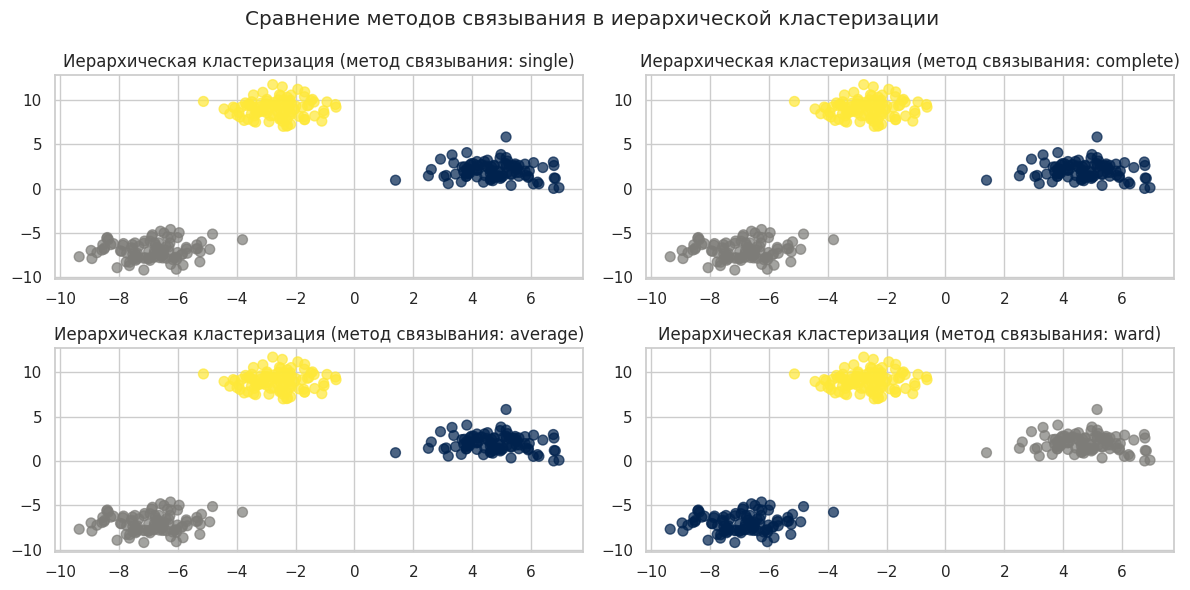

In [ ]:
linkage_methods = ["single", "complete", "average", "ward"]


num_plots = len(linkage_methods)
rows = num_plots // 2 if num_plots % 2 == 0 else (num_plots + 1) // 2
cols = 2

for i, method in enumerate(linkage_methods):

    agglom = AgglomerativeClustering(n_clusters=3, linkage=method)

    # Подгонка модели и предсказание кластеров
    aglomclust = agglom.fit_predict(X_synthetic)

    # Строим график
    plt.subplot(rows, cols, i + 1)
    plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=aglomclust, cmap='cividis', s=50, alpha=0.7)
    plt.title(f"Иерархическая кластеризация (метод связывания: {method})")

plt.suptitle("Сравнение методов связывания в иерархической кластеризации")
plt.tight_layout()
plt.show()

### Датасет iris

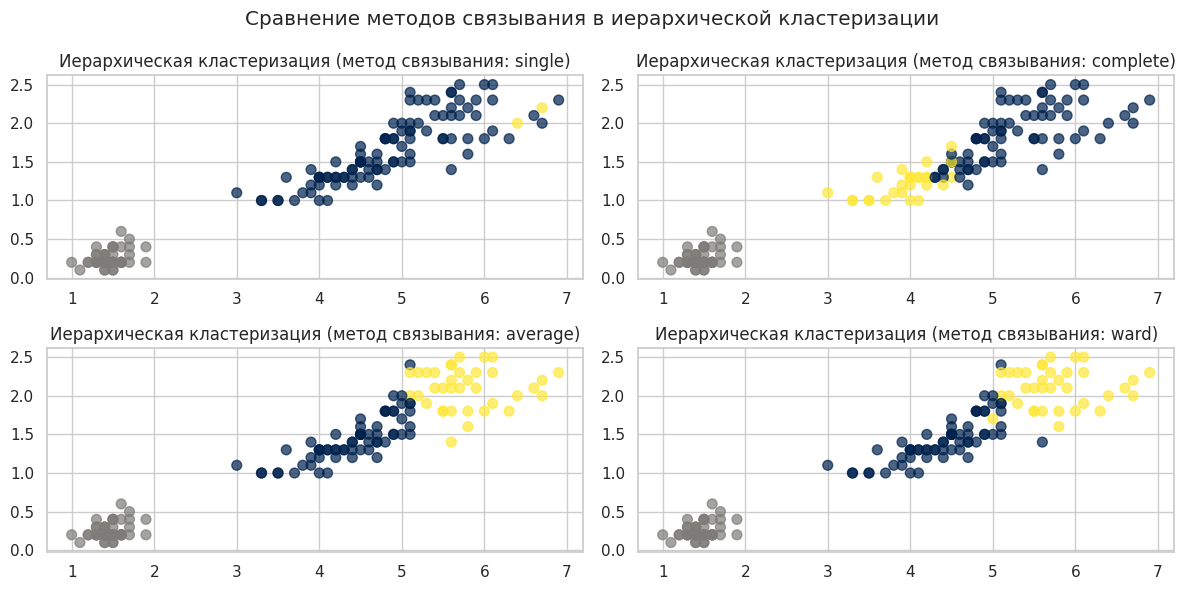

In [ ]:
linkage_methods = ["single", "complete", "average", "ward"]


num_plots = len(linkage_methods)
rows = num_plots // 2 if num_plots % 2 == 0 else (num_plots + 1) // 2
cols = 2

for i, method in enumerate(linkage_methods):

    agglom = AgglomerativeClustering(n_clusters=3, linkage=method)

    # Подгонка модели и предсказание кластеров
    aglomclust = agglom.fit_predict(x_iris)

    # Строим график
    plt.subplot(rows, cols, i + 1)
    plt.scatter(x_iris[:, 2], x_iris[:, 3], c=aglomclust, cmap='cividis', s=50, alpha=0.7)
    plt.title(f"Иерархическая кластеризация (метод связывания: {method})")

plt.suptitle("Сравнение методов связывания в иерархической кластеризации")
plt.tight_layout()
plt.show()